## Random Forest Classifier - Titanic Survival Prediction
dataset :[titanic_train.csv](https://www.kaggle.com/datasets/rashigoel/titanic-machine-learning-from-disaster?select=train.csv)

---
This Dataset is downloaded from kaggle. Dataset conatin information about Passengers of Titanic Ship.

In [125]:
# importing files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [62]:
# loading dataset
df = pd.read_csv('titanic_train.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# rows and columns
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA
We will do some intial anlysis on Dataset for information gain and feature selection.

In [13]:
df.head()
# by seeing output
# we can identify some less useful columns/features for our ml model

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### `Pclass`
We will try to find relation between Pclass column and Survival rate by Visualizing data.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

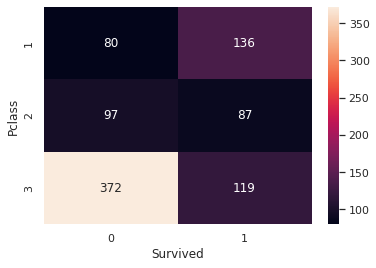

In [59]:
# groupping data and then unstack it
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
# heatmap visualization
sns.heatmap(pclass_survived, annot = True, fmt ="d")

by above heatmap, <br>
we can say, higher class passenger has more survival rate than lower.
Hence, `Pclass` column's contribution to model is **important** <br><br>
### `sex`
Finding correlation between sex and survival rate

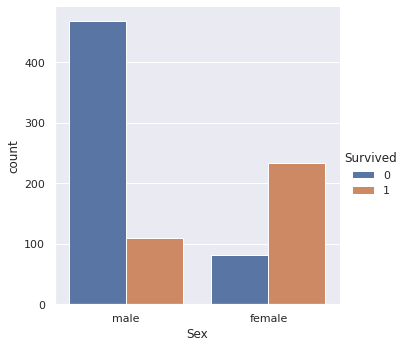

In [43]:
sns.set_theme() # using seaborn's theme
# count plot
sns.catplot(x='Sex', hue='Survived', kind='count', data=df)

by above graph, we can say Survival rate in Female is higher than Male <br>
**Adding Age** column with Sex, for more exploration

<AxesSubplot:xlabel='Sex', ylabel='Age'>

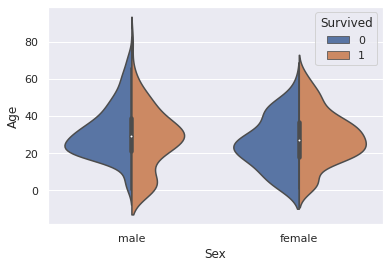

In [44]:
# violin plot
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

Above graphs, give good summary about Men and women in Different age range. 
<br>We can say survival rate is:
* High for children
* good for midrange women
* low for men as age increases

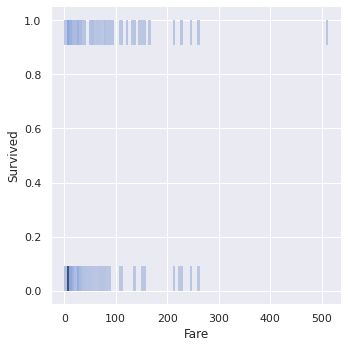

In [50]:
sns.displot(data=df, x='Fare', y='Survived')

#### Conclusion
* In above dataset, we can observe some columns contribute less for making prediction such as  
 `PassengerId`, `Name`, `SibSp`, `Parch`, `Ticket`, `Cabin`, `Embarked`. We will drop this columns.
* As `Sex` column is in string format, we need to convert it into numerical data.

In [63]:
Encode = LabelEncoder()
df['Sex_n'] = Encode.fit_transform(df['Sex'])

In [64]:
# dropping sex column as we have new encoded sex column
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked', 'Sex'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


## Handling Null Values in datasets

* we will check if null values are preset in our dataset
* if yes, then we can either drop the data which contains null or replace null value with appropriate information.

In [65]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Sex_n         0
dtype: int64

In [66]:
# Age column contain null values
# we will use mean of Age to replace Null
df['Age'] = df['Age'].fillna(df['Age'].mean()

In [67]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Sex_n       0
dtype: int64

## Model Creation
For creating machine learning model, we need clean dataset. We have cleaned dataset *df*.<br>
Wew will do further steps for creating ML model:
* Splitting dataset into train test
* creating model
* tunning hyper parameters of model
* checking accuracy and confusion matrix

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis='columns'),df['Survived'], test_size=0.1) 

In [111]:
# Finding correct hyper parameters using gridSearchCV
parameters = { 
            'n_estimators' : [100,200,300],
            'criterion': ['gini','entropy'],
            'max_depth': range(1,11),
            'max_features':['sqrt','log2']}

In [112]:
gsc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)

In [113]:
gsc_result = gsc.fit(X_train,y_train)

In [117]:
best_param = gsc_result.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [118]:
model = RandomForestClassifier(criterion=best_param['criterion'],n_estimators=best_param['n_estimators'])

In [119]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
y_pred = model.predict(X_test)

<AxesSubplot:>

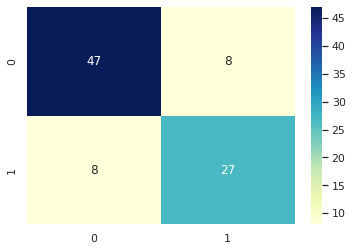

In [127]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='YlGnBu')

In [122]:
model.score(X_test,y_test)

0.8222222222222222

In [126]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.77      0.77      0.77        35

    accuracy                           0.82        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



## Conclusion
* Our model scores 82.22% with test split of dataset.